In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Divide the dataset into independent and independent features

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [5]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [6]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [8]:
# Feature Engg.
geography = pd.get_dummies(X['Geography'],drop_first=True)
gender = pd.get_dummies(X['Gender'],drop_first=True)

In [9]:
# concatenate these variables with dataframe
X = X.drop(["Geography", "Gender"], axis=1)

In [10]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [11]:
X = pd.concat([X,geography,gender],axis=1)

In [12]:
# spliting the dataset into training and testing data
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [16]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [17]:
X_train.shape

(8000, 11)

In [18]:
# let's create the ANN now
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [19]:
# let's initialize the ANN
classifier = Sequential()

In [20]:
# Adding the input layer
classifier.add(Dense(units=11,activation='relu'))

In [21]:
# Adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [22]:
# Adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [23]:
# Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [24]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [25]:
# Adding the learning rate
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)

In [26]:
# Early Stopping

import tensorflow as tf

early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [27]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10, epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 3ms/step - loss: 0.4892 - accuracy: 0.7953 - val_loss: 0.4475 - val_accuracy: 0.8035
Epoch 2/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4303 - accuracy: 0.8119 - val_loss: 0.4321 - val_accuracy: 0.8114
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4157 - accuracy: 0.8229 - val_loss: 0.4238 - val_accuracy: 0.8205
Epoch 4/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.4044 - accuracy: 0.8317 - val_loss: 0.4159 - val_accuracy: 0.8186
Epoch 5/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3925 - accuracy: 0.8395 - val_loss: 0.4018 - val_accuracy: 0.8319
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3782 - accuracy: 0.8457 - val_loss: 0.3880 - val_accuracy: 0.8406
Epoch 7/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3631 - accuracy: 0.8535 - val_loss: 0.3750 - val_accuracy:

In [28]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

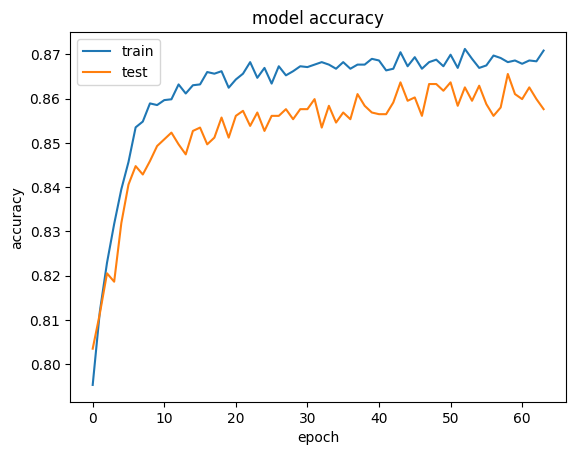

In [29]:
# summarize history for accuracy
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

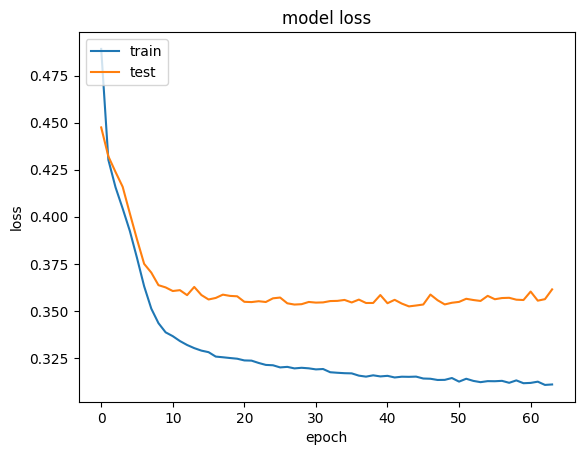

In [30]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

In [31]:
# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 1ms/step


In [32]:
# make a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [33]:
cm

array([[1540,   55],
       [ 218,  187]])

In [34]:
# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.8635

In [35]:
# get the weights
classifier.get_weights()

[array([[-0.03685075,  0.41891375, -0.16822976, -0.0503737 , -0.2894774 ,
         -0.01974535, -0.02326982, -0.02831551,  0.20384064,  0.00585539,
         -0.10142889],
        [-0.37974602,  0.01931999, -0.1583267 ,  0.83970726,  0.315775  ,
         -0.1437894 ,  0.27618018,  0.2730423 ,  0.1382534 ,  1.1668384 ,
          0.28450522],
        [ 0.06592053, -0.16912888, -0.2831713 , -0.12380659,  0.35360733,
          0.41179034,  0.11308065,  0.04863264, -0.5764823 , -0.1837249 ,
         -0.08516779],
        [-0.13402578,  0.03328709, -0.0585304 ,  0.08130547,  0.42760658,
         -1.2934544 ,  0.10116553,  0.17388847,  0.67123663, -0.21514568,
         -0.24034944],
        [ 0.08146482, -0.20723785,  0.00324113,  0.85486376, -0.4775664 ,
          0.4967185 , -1.1648887 ,  1.0198869 ,  0.5585082 , -0.47917968,
         -0.5260162 ],
        [-0.13988826,  0.31982136, -0.25707003,  0.00394411,  0.13161841,
         -0.26793882, -0.16453478, -0.1333494 ,  0.22938292, -0.0904593